In [1]:
# TODO

# N Sampling
# Use 2D DCT for 16 X 16
# Select 16 highest coefficient

In [1]:
import cv2
import os
import numpy as np
import random
from matplotlib import pyplot as plt
from scipy.fftpack import fft, dct, ifft, idct
import multiprocessing

In [58]:
N = 16
C = [1 / pow(2, 0.5)] + [1 for i in range(N - 1)]

def raw_dct2d(img, QF = N):
    Y,X = img.shape
    result = np.zeros(shape=(0,X))
    for y in range(Y // QF):
        tmp = np.zeros(shape=(QF,0))
        for x in range(X // QF):
            t = dct(dct(img[QF*y:QF*(y+1), QF*x:QF*(x+1)].T, norm='ortho').T, norm='ortho')
            tmp = np.hstack([tmp,t])
        result = np.vstack([result, tmp])
    return result

def dct2d(img, QF = N):
    Y,X = img.shape
    result = np.zeros(shape=(0,X))
    for y in range(Y // QF):
        tmp = np.zeros(shape=(QF,0))
        for x in range(X // QF):
            t = dct(dct(img[QF*y:QF*(y+1), QF*x:QF*(x+1)].T, norm='ortho').T, norm='ortho')
            t = t.flatten()
            pivot = np.sort(np.abs(t))[::-1][15]
            t[(-1 * pivot < t) & (t < pivot)] = 0
            t = t.reshape(QF, QF)
            tmp = np.hstack([tmp,t])
        result = np.vstack([result, tmp])
    return result

def idct2d(img, QF = N):
    Y,X = img.shape
    result = np.zeros(shape=(0,X))
    for y in range(Y // QF):
        tmp = np.zeros(shape=(QF,0))
        for x in range(X // QF):
            tmp = np.hstack([tmp, idct(idct(img[QF*y:QF*(y+1), QF*x:QF*(x+1)].T, norm='ortho').T, norm='ortho')])
        result = np.vstack([result, tmp])
    return result


# Use Q Table from paper
# JPEG Steganography: A Performance Evaluation of Quantization Tables
# January 2009
# DOI: 10.1109/AINA.2009.67
# SourceDBLP
# Conference: The IEEE 23rd International Conference on Advanced Information Networking and Applications, AINA 2009, Bradford, United Kingdom, May 26-29, 2009
# Q = np.array([
#     [ 7,  7,  7,  7,  7,  7,  8,  8,  9,  9, 10, 11, 12, 13, 14, 15],
#     [ 7,  7,  7,  7,  7,  8,  8,  9,  9, 10, 11, 12, 13, 14, 15, 17],
#     [ 7,  7,  7,  7,  8,  8,  9,  9, 10, 11, 12, 13, 14, 15, 17, 18],
#     [ 7,  7,  7,  8,  8,  9,  9, 10, 11, 12, 13, 14, 15, 17, 18, 20],
#     [ 7,  7,  8,  8,  9,  9, 10, 11, 12, 13, 14, 15, 17, 18, 20, 22],
#     [ 7,  8,  8,  9,  9, 10, 11, 12, 13, 14, 15, 17, 18, 20, 22, 24],
#     [ 8,  8,  9,  9, 10, 11, 12, 13, 14, 15, 17, 18, 20, 22, 24, 26],
#     [ 8,  9,  9, 10, 11, 12, 13, 14, 15, 17, 18, 20, 22, 24, 26, 28],
#     [ 9,  9, 10, 11, 12, 13, 14, 15, 17, 18, 20, 22, 24, 26, 28, 30],
#     [ 9, 10, 11, 12, 13, 14, 15, 17, 18, 20, 22, 24, 26, 28, 30, 33],
#     [10, 11, 12, 13, 14, 15, 17, 18, 20, 22, 24, 26, 28, 30, 33, 36],
#     [11, 12, 13, 14, 15, 17, 18, 20, 22, 24, 26, 28, 30, 33, 36, 39],
#     [12, 13, 14, 15, 17, 18, 20, 22, 24, 26, 28, 30, 33, 36, 39, 42],
#     [13, 14, 15, 17, 18, 20, 22, 24, 26, 28, 30, 33, 36, 39, 42, 45],
#     [14, 15, 17, 18, 20, 22, 24, 26, 28, 30, 33, 36, 39, 42, 45, 49],
#     [15, 17, 18, 20, 22, 24, 26, 28, 30, 33, 36, 39, 42, 45, 49, 52]
# ])

# # def get_Fvu(v, u, S):
# def get_Fvu(params):
#     v,u,S,order = params
#     result = 0
#     for y in range(N):
#         for x in range(N):
#             result += (1/4) * C[u] * C[v] * S[y][x] * np.cos(v*np.pi * (2*y + 1) / (2*N)) * np.cos(u*np.pi * (2*x + 1) / (2*N))
#     return {order : result}

# # def get_Syx(y, x, F):
# def get_Syx(params):
#     y,x,F,order = params
#     result = 0
#     for v in range(N):
#         for u in range(N):
#             result += (1/4) * C[v] * C[u] * F[v][u] * np.cos(v*np.pi * (2*y + 1) / (2*N)) * np.cos(u*np.pi * (2*x + 1) / (2*N))
#     return {order : result}


# def myDct2D(img, QF=N):
#     Y,X = img.shape
#     result = np.zeros(shape=(0,X))
#     for y_block in range(Y // QF):
#         print(y_block)
#         tmp1 = np.zeros(shape=(QF,0))
#         for x_block in range(X // QF):
#             tmp2 = np.zeros(shape=(0,QF))
#             for y_idx in range(QF):
#                 tmp3 = np.array([])
#                 pool = multiprocessing.Pool(processes=QF)
#                 order = [i for i in range(QF)]
#                 r = pool.map(get_Fvu, zip([y_idx for y_idx in range(QF)], [x_idx for x_idx in range(QF)], [img[QF*y_block : QF*(y_block + 1), QF*x_block : QF*(x_block + 1)] for i in range(QF)], [o for o in range(QF)]))
#                 pool.close()
#                 pool.join()
#                 for i in range(QF):
#                     tmp3 = np.append(tmp3, r[i].get(i))
#                 tmp2 = np.vstack([tmp2, tmp3])
# #             print(tmp2)
# #             t = dct(dct(img[QF*y:QF*(y+1), QF*x:QF*(x+1)].T, norm='ortho').T, norm='ortho')
# #             t = t.flatten()
# #             pivot = np.sort(np.abs(t))[::-1][15]
# #             print(pivot)
# #             t[(-1 * pivot < t) & (t < pivot)] = 0
# #             t = t.reshape(QF, QF)
# #             tmp2 = tmp2.flatten()
# #             pivot = np.sort(np.abs(tmp2))[::-1][15]
# #             tmp2[(-1 * pivot < tmp2) & (tmp2 < pivot)] = 0
# #             tmp2 = tmp2.reshape(QF, QF)
# #             print(tmp2)
#             tmp1 = np.hstack([tmp1, tmp2])
#         result = np.vstack([result, tmp1])
#     return result

# def myIDct2D(img, QF=N):
#     Y,X = img.shape
#     result = np.zeros(shape=(0,X))
#     for y_block in range(Y // QF):
#         print(y_block)
#         tmp1 = np.zeros(shape=(QF,0))
#         for x_block in range(X // QF):
#             tmp2 = np.zeros(shape=(0,QF))
#             for y_idx in range(QF):
#                 tmp3 = np.array([])
#                 pool = multiprocessing.Pool(processes=QF)
#                 order = [i for i in range(QF)]
#                 r = pool.map(get_Syx, zip([y_idx for y_idx in range(QF)], [x_idx for x_idx in range(QF)], [img[QF*y_block : QF*(y_block + 1), QF*x_block : QF*(x_block + 1)] for i in range(QF)], [o for o in range(QF)]))
#                 pool.close()
#                 pool.join()
#                 for i in range(QF):
#                     tmp3 = np.append(tmp3, r[i].get(i))
#                 tmp2 = np.vstack([tmp2, tmp3])
#             tmp1 = np.hstack([tmp1, tmp2])
#         result = np.vstack([result, tmp1])
#     return result


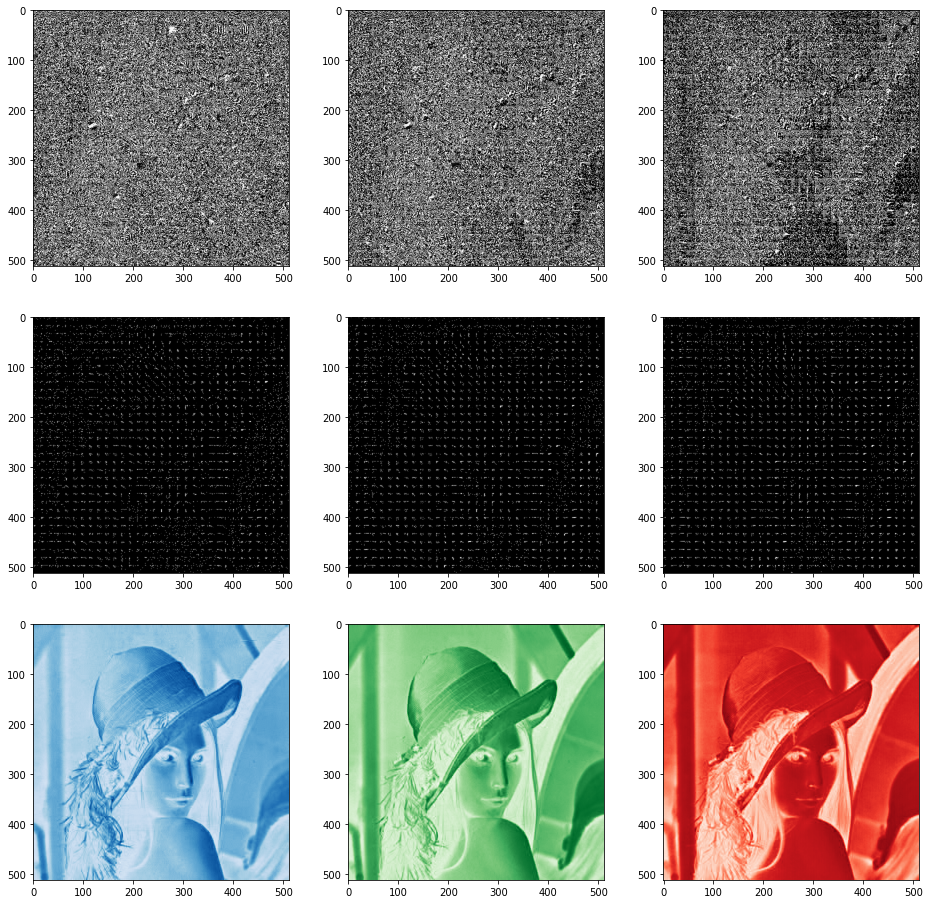

In [60]:
img_b, img_g, img_r = cv2.split(cv2.imread("Lenna.png"))
qf = 16
img_b = np.array(img_b, dtype=np.float64)
img_g = np.array(img_g, dtype=np.float64)
img_r = np.array(img_r, dtype=np.float64)
raw_dct_b = raw_dct2d(img_b, qf)
raw_dct_g = raw_dct2d(img_g, qf)
raw_dct_r = raw_dct2d(img_r, qf)
dct_b = dct2d(img_b, qf)
dct_r = dct2d(img_r, qf)
dct_g = dct2d(img_g, qf)
fig=plt.figure(figsize=(16, 16))
columns = 3
rows = 3
# for i in range(1, columns*rows +1):
fig.add_subplot(rows, columns, 1)
plt.imshow(np.uint8(raw_dct_b), cmap="gray")
fig.add_subplot(rows, columns, 2)
plt.imshow(np.uint8(raw_dct_g), cmap="gray")
fig.add_subplot(rows, columns, 3)
plt.imshow(np.uint8(raw_dct_r), cmap="gray")
fig.add_subplot(rows, columns, 4)
plt.imshow(np.uint8(dct_b), cmap="gray")
fig.add_subplot(rows, columns, 5)
plt.imshow(np.uint8(dct_g), cmap="gray")
fig.add_subplot(rows, columns, 6)
plt.imshow(np.uint8(dct_r), cmap="gray")
idct_b = idct2d(dct_b, qf)
idct_r = idct2d(dct_r, qf)
idct_g = idct2d(dct_g, qf)
fig.add_subplot(rows, columns, 7)
plt.imshow(idct_b, cmap="Blues")
fig.add_subplot(rows, columns, 8)
plt.imshow(idct_g, cmap="Greens")
fig.add_subplot(rows, columns, 9)
plt.imshow(idct_r, cmap="Reds")
plt.show()


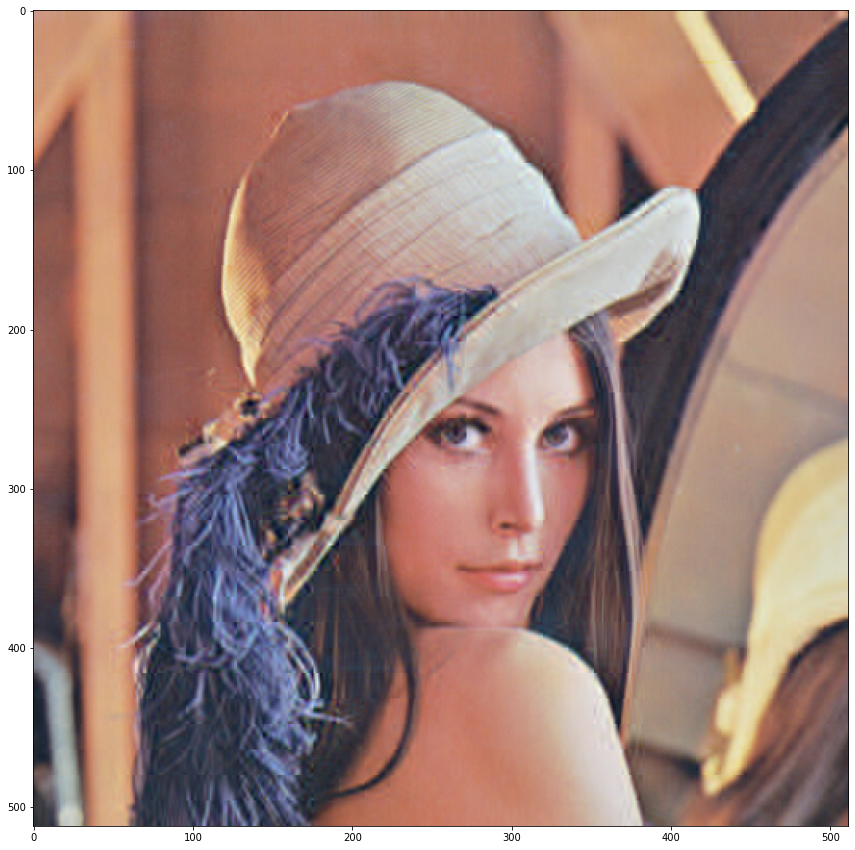

In [62]:
# bgr = cv2.cvtColor(cv2.merge((idct_b, idct_g, idct_r)), cv2.COLOR_BGR2RGB)
# bgr = cv2.cvtColor(cv2.merge((np.uint8(idct_b), np.uint8(idct_g), np.uint8(idct_r))), cv2.COLOR_BGR2RGB)
bgr = cv2.cvtColor(cv2.merge((
    np.uint8(np.interp(idct_b, (idct_b.min(), idct_b.max()), (0, +255))), 
    np.uint8(np.interp(idct_g, (idct_g.min(), idct_g.max()), (0, +255))), 
    np.uint8(np.interp(idct_r, (idct_r.min(), idct_r.max()), (0, +255)))
)), cv2.COLOR_BGR2RGB)
fig=plt.figure(figsize=(15, 15))
fig.add_subplot(1, 1, 1)
plt.imshow(bgr)

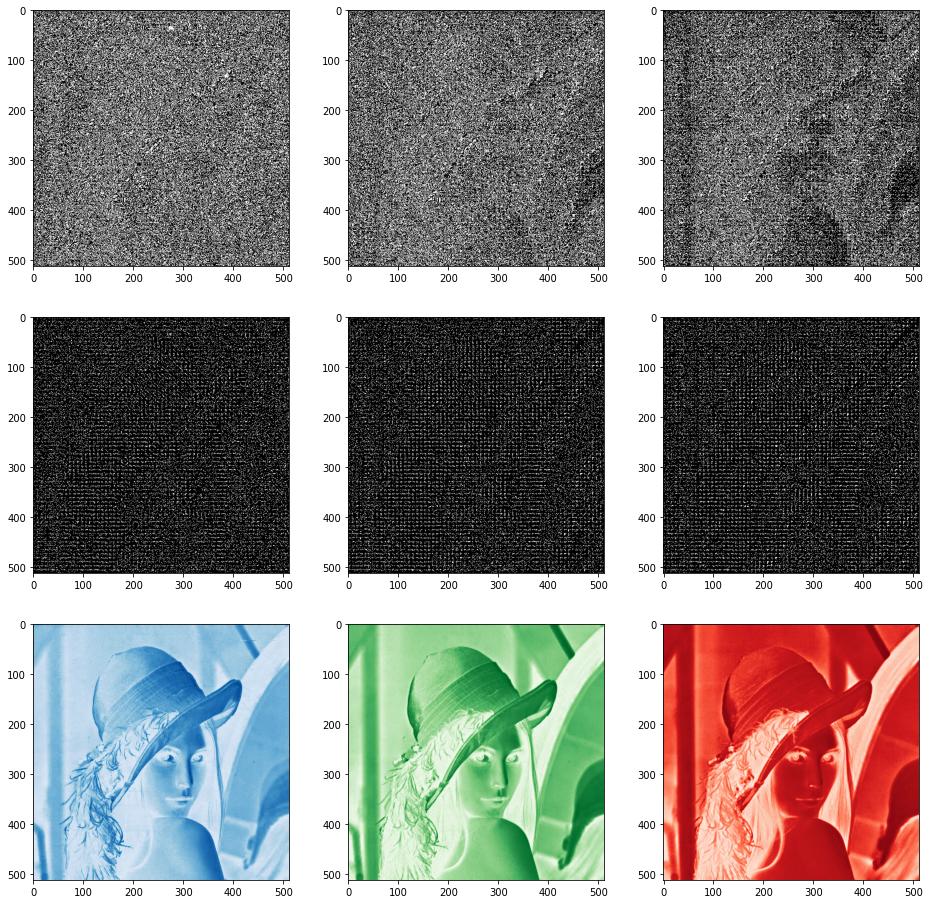

In [73]:
img_b, img_g, img_r = cv2.split(cv2.imread("Lenna.png"))
qf = 8
img_b = np.array(img_b, dtype=np.float64)
img_g = np.array(img_g, dtype=np.float64)
img_r = np.array(img_r, dtype=np.float64)
raw_dct_b = raw_dct2d(img_b, qf)
raw_dct_g = raw_dct2d(img_g, qf)
raw_dct_r = raw_dct2d(img_r, qf)
dct_b = dct2d(img_b, qf)
dct_r = dct2d(img_r, qf)
dct_g = dct2d(img_g, qf)
fig=plt.figure(figsize=(16, 16))
columns = 3
rows = 3
# for i in range(1, columns*rows +1):
fig.add_subplot(rows, columns, 1)
plt.imshow(np.uint8(raw_dct_b), cmap="gray")
fig.add_subplot(rows, columns, 2)
plt.imshow(np.uint8(raw_dct_g), cmap="gray")
fig.add_subplot(rows, columns, 3)
plt.imshow(np.uint8(raw_dct_r), cmap="gray")
fig.add_subplot(rows, columns, 4)
plt.imshow(np.uint8(dct_b), cmap="gray")
fig.add_subplot(rows, columns, 5)
plt.imshow(np.uint8(dct_g), cmap="gray")
fig.add_subplot(rows, columns, 6)
plt.imshow(np.uint8(dct_r), cmap="gray")
idct_b = idct2d(dct_b, qf)
idct_r = idct2d(dct_r, qf)
idct_g = idct2d(dct_g, qf)
fig.add_subplot(rows, columns, 7)
plt.imshow(idct_b, cmap="Blues")
fig.add_subplot(rows, columns, 8)
plt.imshow(idct_g, cmap="Greens")
fig.add_subplot(rows, columns, 9)
plt.imshow(idct_r, cmap="Reds")
plt.show()

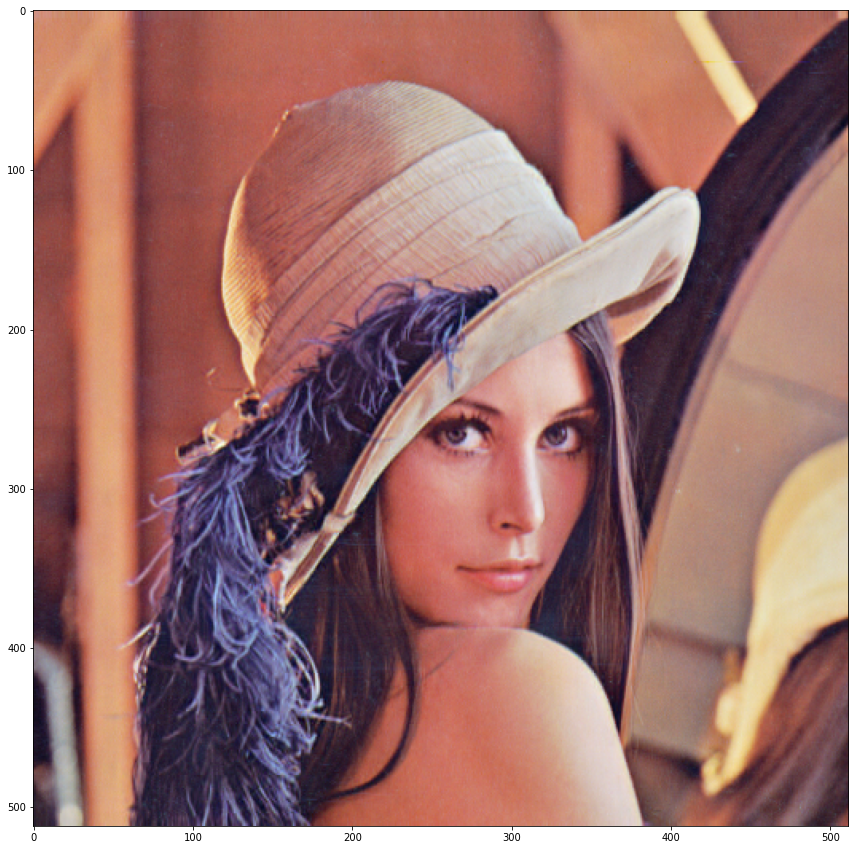

In [74]:
bgr = cv2.cvtColor(cv2.merge((
    np.uint8(np.interp(idct_b, (idct_b.min(), idct_b.max()), (0, +255))), 
    np.uint8(np.interp(idct_g, (idct_g.min(), idct_g.max()), (0, +255))), 
    np.uint8(np.interp(idct_r, (idct_r.min(), idct_r.max()), (0, +255)))
)), cv2.COLOR_BGR2RGB)
fig=plt.figure(figsize=(15, 15))
fig.add_subplot(1, 1, 1)
plt.imshow(bgr)

4.2137860731066406
3.64803167548358
4.67035629387819
6.404437652647522
4.499181037124698
3.432344134027887
4.295379187106222
4.349953882964675
3.461057132552987
4.022682554505976
3.6834818270086283
5.980916702286433
4.776742797646724
4.33173461778663
3.8524019040639725
4.338647517524992
3.9420129353930298
3.7702630122450573
3.3855135115104376
4.291330405353021
5.336115176714996
3.8996627124880185
3.782548941565908
4.376083381170675
4.232610901446255
7.117038650745275
3.737148496682421
4.348872745830054
6.24067511496485
3.9189908933309283
4.80037924531227
4.346675501208763
6.988190854253554
13.568586684732967
4.076963817013085
4.218920082512545
5.428950544225706
5.198124419870384
4.3786048289067345
5.134536901775324
12.098598700659572
4.654425455266732
3.6069720932882743
3.8517823775613675
4.646188649276024
5.29390137202378
4.356293601654476
4.544374864982258
6.694642876048403
4.652568647575322
4.216292926889649
4.5738541142812545
5.675720219868687
4.629228146752768
4.141373378027794
6.

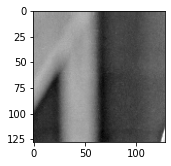

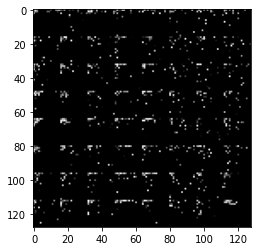

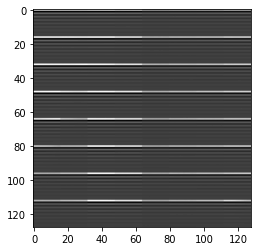

In [65]:
img = np.array(cv2.imread("Lenna.png", 0) ,dtype=np.float64)
test_img = img[:128, :128]
# nonq_dct_img = myDct2D(test_img)
lib_dct_img = dct2d(test_img)

lib_idct_img = idct2d(dct_img)
lib_nonq_idct_img = idct2d(nonq_dct_img)

fig=plt.figure(figsize=(8, 8))
columns = 3
rows = 1
fig.add_subplot(rows, columns, 1)
plt.imshow(test_img, cmap='gray')
plt.show()
fig.add_subplot(rows, columns, 2)
plt.imshow(np.uint8(lib_dct_img*255.0), cmap='gray')
plt.show()
fig.add_subplot(rows, columns, 3)
plt.imshow(lib_nonq_idct_img, cmap='gray')
plt.show()

In [54]:
print(lib_dct_img)

[[2648.9375       10.98315881   -5.4688696  ...    0.
     0.            0.        ]
 [  17.51689258    5.66912995   -5.50767536 ...    0.
     0.            0.        ]
 [   6.81731083    0.            0.         ...    0.
     0.            0.        ]
 ...
 [   0.            0.            0.         ...    0.
     0.            0.        ]
 [   0.            0.            0.         ...    0.
     0.            0.        ]
 [   0.            0.            0.         ...    0.
     0.            0.        ]]


In [ ]:
fig=plt.figure(figsize=(8, 8))
imgcv1 = np.uint8(ll*255.0)
columns = 1
rows = 1
# for i in range(1, columns*rows +1):
fig.add_subplot(rows, columns, 1)
plt.imshow(imgcv1, cmap='gray')
plt.show()


In [ ]:
img = np.array(cv2.imread("Lenna.png", 0) ,dtype=np.float64)

d = dct2d(img)
imgcv1 = np.uint8(d*255.0)    # convert back to int
r = idct2d(d)
imgcv2 = r    # convert back to int

fig=plt.figure(figsize=(8, 8))

columns = 2
rows = 1
# for i in range(1, columns*rows +1):
fig.add_subplot(rows, columns, 1)
plt.imshow(imgcv1, cmap='gray')
fig.add_subplot(rows, columns, 2)
plt.imshow(imgcv2, cmap='gray')
plt.show()


In [ ]:
img = np.array(cv2.imread("Lenna.png", 0) ,dtype=np.float64)
 
fig=plt.figure(figsize=(8, 8))
columns = 1
rows = 1
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()
Y, X = img.shape

In [ ]:
F = []
for y in range(Y // N):
    for x in range(X // N):
        tmp = np.zeros(shape = (N, N))
        for v in range(N):
            for u in range(N):
                tmp[v][u] = get_Fvu(v, u, img[N*y:N*(y+1), N*x:N*(x+1)])
        F.append(tmp)

In [ ]:
k = list(map(int, input().split()))

In [ ]:
Q

In [ ]:
from scipy.fftpack import fft, dct, ifft, idct


In [ ]:
d = dct(dct(Q.T, norm='ortho').T, norm='ortho')

In [ ]:
d.shape

In [ ]:
d[0][0]

In [ ]:
r = idct(idct(d.T, norm='ortho').T, norm='ortho')

In [ ]:
Q - r

In [ ]:
r